In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("/home/maria/projeto/image-classifier/data/imageDataSet.csv")

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

df1=df.drop("Target",axis=1)
y=df["Target"]
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.30, random_state=42)


In [5]:
from sklearn.model_selection import GridSearchCV

lista_parametros = { 'criterion' : ['gini','entropy'],
                    'n_estimators' : [50,75,100,120, 150],
                    'max_depth' : [2, 4, 5, 10, None],
                    'min_samples_split' : [2,5,10], # Default = 2
                    'min_samples_leaf' : [1, 3,  5], # Default = 1
                    'max_features' : ['auto', 'sqrt', 'log2'], # Default = "auto"
                    'max_leaf_nodes' : [3, 4, 5, None],
                    'min_samples_leaf' : [1, 4, 10], # Default = 1
                    }
model = ensemble.RandomForestClassifier()

clf = GridSearchCV(estimator=model,param_grid=lista_parametros, n_jobs= -1)
clf.fit(X_train, y_train)

print("Best parameters:")
print()
print(clf.best_params_)
print()
print(clf.best_score_)

Best parameters:

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

0.9490025182618635


In [4]:
model2 = ensemble.RandomForestClassifier(criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150)
model2.fit(X_train, y_train)
print(model2.score(X_test,y_test))

0.9503956177723676


In [5]:
Y_pred=model2.predict(X_test)

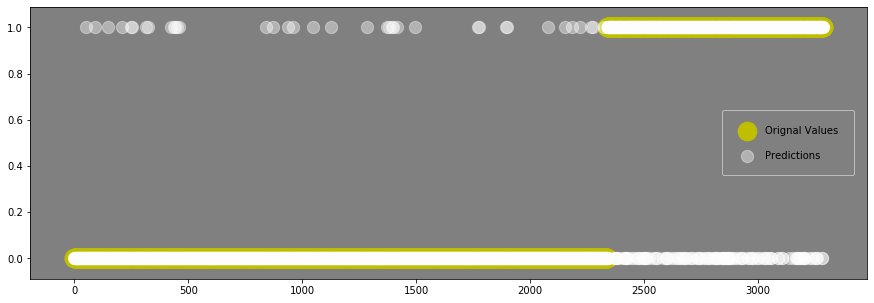

In [6]:

plt.figure(figsize=(15,5))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'gray'

plt.scatter(range(len(y_test)), y_test.iloc[idx],label="Orignal Values",s=350,alpha=1,c='y')

plt.scatter(range(len(y_test)), Y_pred[idx],label="Predictions",s=150,alpha=0.4 ,c='w', edgecolors='w')

plt.legend(bbox_to_anchor=(0.99, 0.5),loc='center right',borderpad=1.5, labelspacing=1.5)

In [7]:
from sklearn.metrics import confusion_matrix


In [8]:
cfm=confusion_matrix(y_test, Y_pred)

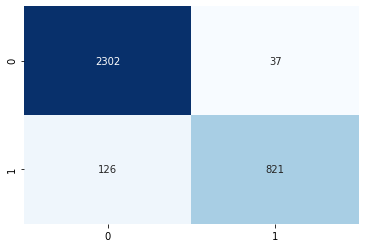

In [13]:
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")
